In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from pathlib import Path
from sklearn.model_selection import learning_curve
import numpy as np

In [2]:
# Load CSV file
filepath = Path.cwd().parent/"dataSet" / "player_stats.csv"
data = pd.read_csv(filepath, encoding='latin1')

#drop duplicate values
data = data.drop_duplicates()


In [3]:
# Remove dots and dollar signs, and convert to float
data['value'] = data['value'].replace('[^\d]', '', regex=True).astype(float)
data

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,1400000.0
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,97500.0
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,1100000.0
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,65000.0
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,NaN,41,...,84,69,86,83,11,14,14,9,14,99500000.0
5678,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,NaN,38,...,77,64,75,75,7,10,10,15,14,101000000.0
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,NaN,29,...,88,87,91,86,15,9,9,15,11,99500000.0
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,31000000.0


In [4]:
# Remove null column and player column as the name should not affect the market value  
data.drop('marking', axis=1, inplace=True)
data.drop('player', axis=1, inplace=True)
data

,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Colombia,192,84,22,Atl. Nacional,55,43,68,73,72,...,32,34,41,33,10,11,6,7,9,1400000.0
1,Brazil,181,80,31,Corinthians,69,70,56,58,62,...,65,62,48,46,12,15,14,8,14,97500.0
2,Germany,193,84,29,Holstein Kiel,25,12,13,16,27,...,20,15,26,16,64,74,65,68,74,1100000.0
3,Austria,187,86,33,SK Rapid Wien,46,48,66,69,71,...,25,13,22,19,10,10,8,14,9,65000.0
4,Uruguay,191,80,23,Independiente,14,8,14,16,28,...,9,10,16,5,61,59,62,64,64,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Egypt,175,71,31,Liverpool,86,88,41,43,63,...,84,69,86,83,11,14,14,9,14,99500000.0
5678,Senegal,174,69,31,FC Bayern München,86,88,38,42,75,...,77,64,75,75,7,10,10,15,14,101000000.0
5679,Brazil,175,68,31,Paris SG,94,95,29,32,63,...,88,87,91,86,15,9,9,15,11,99500000.0
5680,Portugal,187,83,38,Al Nassr,87,81,24,32,62,...,79,75,90,85,14,7,11,15,11,31000000.0


In [5]:
# Encode categorical columns to integers if present
categorical_columns = ['country', 'club']  # Removed 'player' as it was dropped earlier
for col in categorical_columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])
encoded_df = data
encoded_df

,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,24,192,84,22,63,55,43,68,73,72,...,32,34,41,33,10,11,6,7,9,1400000.0
1,14,181,80,31,154,69,70,56,58,62,...,65,62,48,46,12,15,14,8,14,97500.0
2,47,193,84,29,315,25,12,13,16,27,...,20,15,26,16,64,74,65,68,74,1100000.0
3,8,187,86,33,535,46,48,66,69,71,...,25,13,22,19,10,10,8,14,9,65000.0
4,130,191,80,23,330,14,8,14,16,28,...,9,10,16,5,61,59,62,64,64,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,37,175,71,31,383,86,88,41,43,63,...,84,69,86,83,11,14,14,9,14,99500000.0
5678,107,174,69,31,210,86,88,38,42,75,...,77,64,75,75,7,10,10,15,14,101000000.0
5679,14,175,68,31,454,94,95,29,32,63,...,88,87,91,86,15,9,9,15,11,99500000.0
5680,100,187,83,38,35,87,81,24,32,62,...,79,75,90,85,14,7,11,15,11,31000000.0


In [6]:
# Separate features and target
X = encoded_df.drop('value', axis=1)  
y = encoded_df['value']

In [7]:
# Split the dataset into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.7, random_state=42)

# Further split the test set into training and validation sets (70% testing, 30% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,train_size = 0.7, random_state=42)

In [8]:
#create base DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 18048910686690.14
R-squared Score: 0.7225202762904226


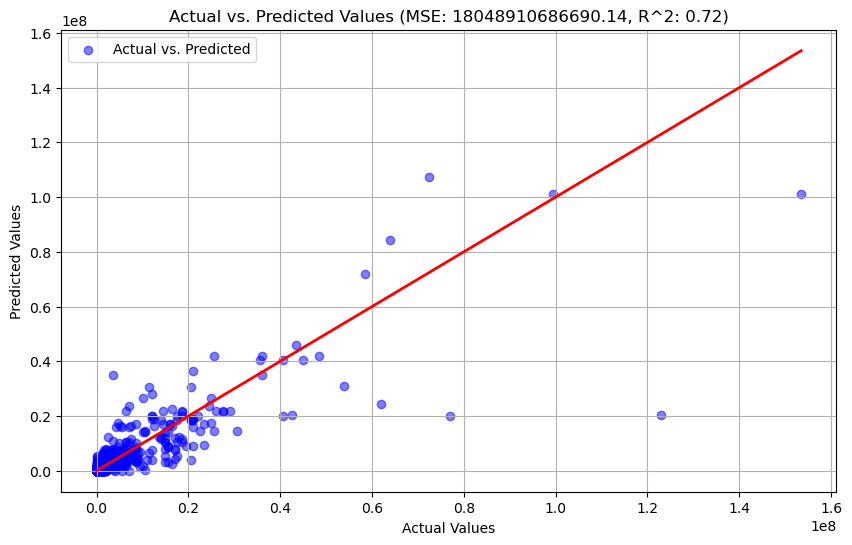

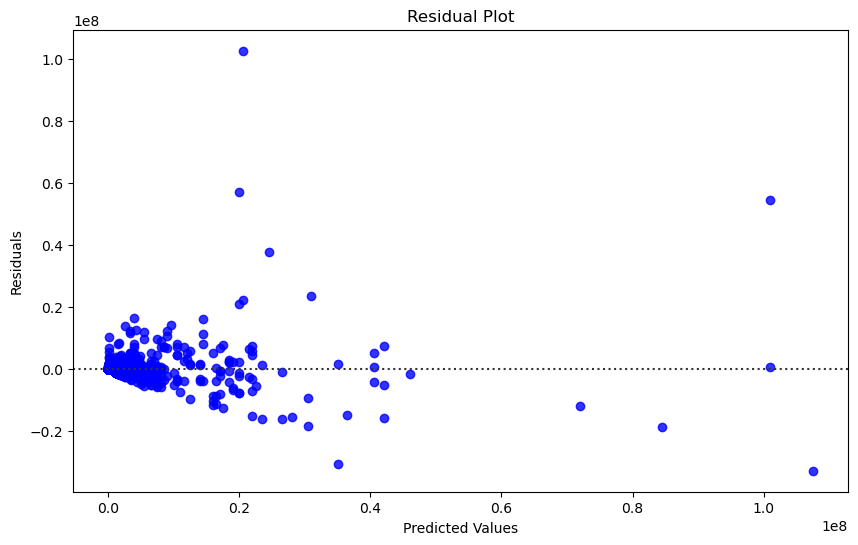

In [9]:
# Create scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (MSE: {mse:.2f}, R^2: {r2:.2f})')

# create diagonal line that shows perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)
plt.legend()
plt.grid(True)
plt.show()

## Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, color="b")
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Training Sizes: [ 454 1362 2271 3180 4088 4543] 
 Training Scores: [[-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]] 
 test_scores : [[-1.61183254e+13 -1.74768121e+13 -1.65740809e+13 -2.49420902e+13
  -5.29865832e+13]
 [-2.34241953e+13 -1.57202677e+13 -1.97229248e+13 -2.04963162e+13
  -2.91275226e+13]
 [-1.24576256e+13 -1.30923194e+13 -1.50277969e+13 -1.37180963e+13
  -2.37139431e+13]
 [-9.92795683e+12 -7.84265339e+12 -1.04550555e+13 -1.40865437e+13
  -2.98694509e+13]
 [-7.94967985e+12 -7.88074785e+12 -1.34421356e+13 -2.14027627e+13
  -2.48614749e+13]
 [-1.69474738e+13 -1.52244897e+13 -1.19401840e+13 -8.55334553e+12
  -2.20159031e+13]]


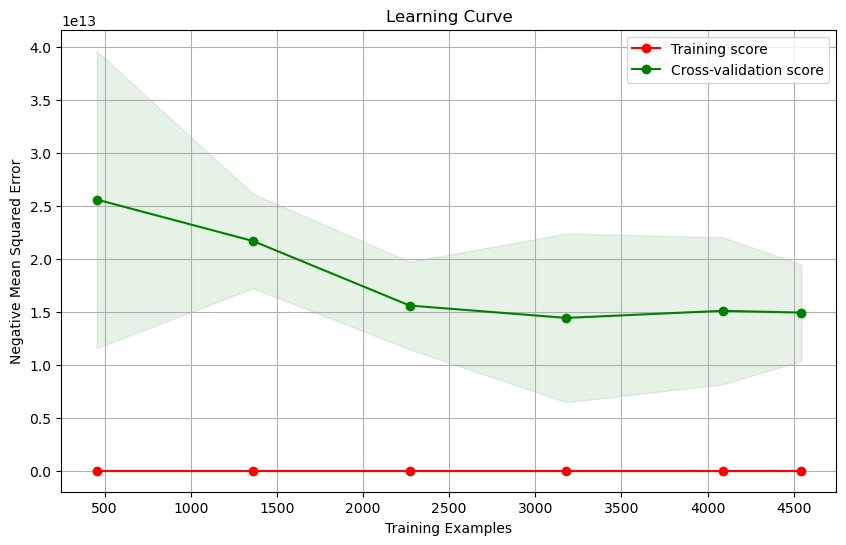

In [10]:
#visualise this models learning curve
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeRegressor(random_state=42), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9, 1], 
    cv=5, scoring='neg_mean_squared_error', random_state=42
)

print(f"Training Sizes: {train_sizes} \n Training Scores: {train_scores} \n test_scores : {test_scores}")

# Calculate mean and standard deviation for training set scores and validation set scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 1
Mean Squared Error: 16528744489647.887
R-squared score: 0.7458909552011994

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 2
Mean Squared Error: 27804332123046.59
R-squared score: 0.5725427130003091

Parameters: max_depth = None, min_samples_split = 2, min_samples_leaf = 4
Mean Squared Error: 17070083193083.207
R-squared score: 0.7375685408200754

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 1
Mean Squared Error: 21237620605283.484
R-squared score: 0.6734977971746192

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 2
Mean Squared Error: 30173982613435.09
R-squared score: 0.5361122616132263

Parameters: max_depth = None, min_samples_split = 5, min_samples_leaf = 4
Mean Squared Error: 17070083193083.207
R-squared score: 0.7375685408200754

Parameters: max_depth = None, min_samples_split = 10, min_samples_leaf = 1
Mean Squared Error: 3250487

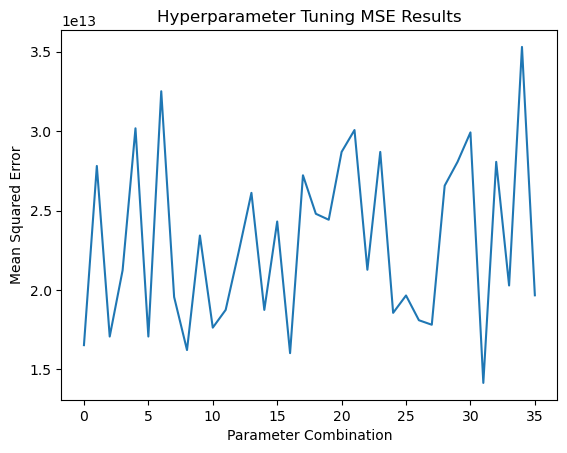

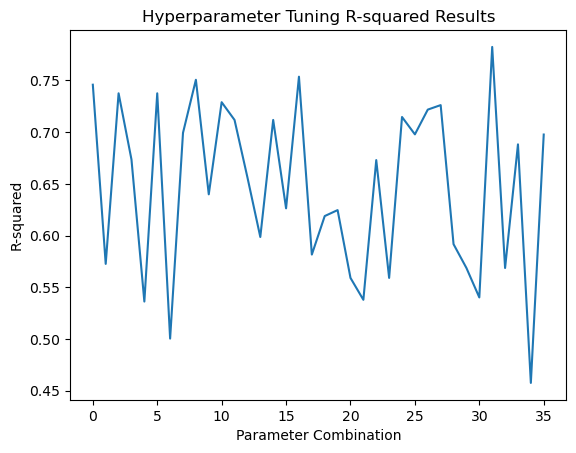

In [11]:
#Basic hyperparameter tuning
max_depths = [None, 10, 20, 30]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

# Lists to store performance metrics
MSE = []
R2 = []

# Hyperparameter tuning loop
for depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            
            # Initialize and train DecisionTreeRegressor
            model = DecisionTreeRegressor(max_depth=depth, 
                                             min_samples_split=min_samples_split,
                                             min_samples_leaf=min_samples_leaf,
                                             random_state=42, max_features='sqrt')
            
            model.fit(X_train, y_train)
            
            # Make predictions and compute Mean Squared Error and R-squared score
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            # Append MSE and R2 to the list
            MSE.append(mse)
            R2.append(r2)
            
            # Print the results
            print(f"Parameters: max_depth = {depth}, min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}")
            print(f"Mean Squared Error: {mse}")
            print(f"R-squared score: {r2}\n")

# Plotting results
# Visualize the MSE values corresponding to different hyperparameters
plt.plot(range(len(MSE)), MSE)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Tuning MSE Results')
plt.show()

# Visualize the R-Squared score values corresponding to different hyperparameters
plt.plot(range(len(R2)), R2)
plt.xlabel('Parameter Combination')
plt.ylabel('R-squared')
plt.title('Hyperparameter Tuning R-squared Results')
plt.show()

R^2 Score: 0.7278526633389748
Mean Squared Error: 16853118072489.629


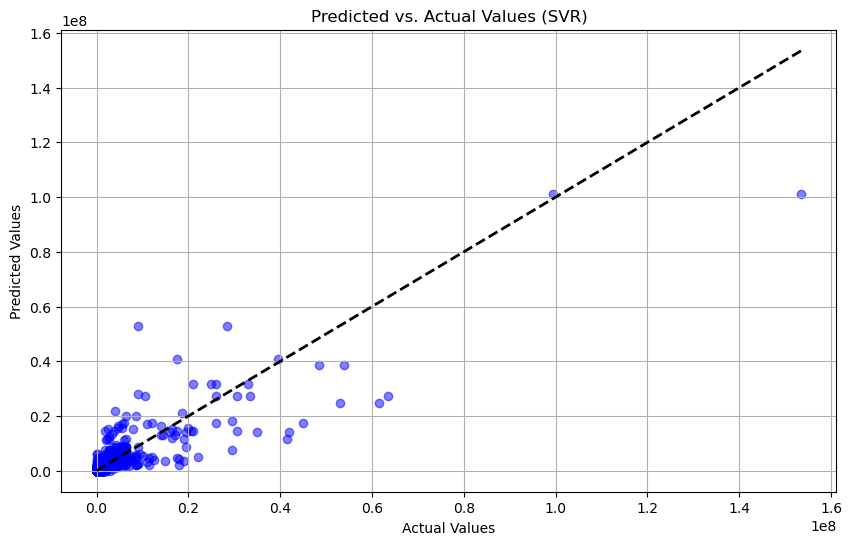

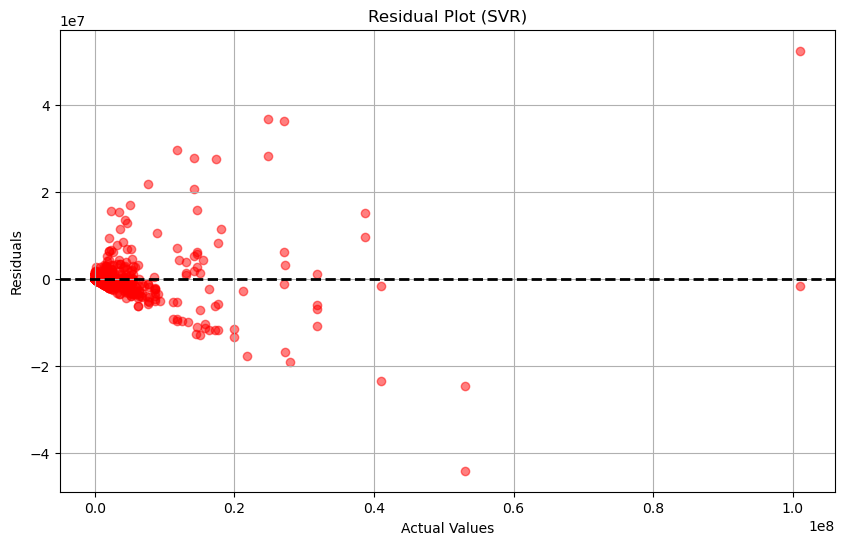

In [12]:
# Predictions
best_model = DecisionTreeRegressor(max_depth=30, 
                                             min_samples_split=5,
                                             min_samples_leaf=2,
                                             random_state=42, max_features='sqrt')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# Evaluate with different metrics
r2_score = r2_score(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
print(f"R^2 Score: {r2_score}")
print(f"Mean Squared Error: {mse}")


# Plotting the Predicted vs. Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, color='blue', alpha=0.5)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Desicion Tree)')
plt.grid(True) 
plt.show()

# Calculate residuals
residuals = y_valid - y_pred

# Plotting the Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Desicion Tree)')
plt.grid(True)
plt.show()